# 📊 Feature Scaling in Machine Learning – A Complete Guide


## 🔹 1. Introduction

Feature scaling is a crucial preprocessing step in many machine learning pipelines. It brings all the features to a comparable scale, which is essential for distance-based or gradient-based models like:

- KNN
- SVM
- Linear Regression
- Logistic Regression
- Neural Networks



## 🔹 2. Why Feature Scaling?

Let’s say you have a dataset with two features:

- `Age`: 18–60
- `Salary`: 30,000–200,000

These features have very different ranges. Algorithms might prioritize the one with the larger scale (salary), which isn't ideal unless that feature is indeed more important.



## 🔹 3. Mathematical Explanation

### ✅ Min-Max Scaling (Normalization)

Rescales values between 0 and 1.

$$
x_{\text{scaled}} = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}
$$

### ✅ Standardization (Z-score Normalization)

Centers data around mean 0 and standard deviation 1.

$$
x_{\text{scaled}} = \frac{x - \mu}{\sigma}
$$


## 🔹 4. Python Implementation

In [1]:

import numpy as np
import pandas as pd

data = np.array([
    [25, 50000],
    [35, 80000],
    [45, 120000],
    [20, 30000]
])

df = pd.DataFrame(data, columns=["Age", "Salary"])
df


,Age,Salary
0,25,50000
1,35,80000
2,45,120000
3,20,30000


## 🔹 5. Using Scikit-learn

In [2]:

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Min-Max Scaling
minmax = MinMaxScaler()
minmax_scaled = minmax.fit_transform(data)

# Standard Scaling
standard = StandardScaler()
standard_scaled = standard.fit_transform(data)

# Show results
pd.DataFrame(minmax_scaled, columns=["Age_scaled", "Salary_scaled"])


,Age_scaled,Salary_scaled
0,0.2,0.222222
1,0.6,0.555556
2,1.0,1.000000
3,0.0,0.000000


In [3]:

pd.DataFrame(standard_scaled, columns=["Age_standardized", "Salary_standardized"])


,Age_standardized,Salary_standardized
0,-0.650945,-0.589768
1,0.390567,0.294884
2,1.432078,1.474420
3,-1.171700,-1.179536


## 🔹 6. From Scratch (NumPy)

In [7]:

def min_max_scale(data):
    return (data - np.min(data, axis=0)) / (np.max(data, axis=0) - np.min(data, axis=0))

def standardize(data):
    return (data - np.mean(data, axis=0)) / np.std(data, axis=0)

print(f"Min-Max from scratch:\n {min_max_scale(data)}\n")
print(f"Standardized from scratch:\n{standardize(data)}\n")


Min-Max from scratch:
 [[0.2        0.22222222]
 [0.6        0.55555556]
 [1.         1.        ]
 [0.         0.        ]]

Standardized from scratch:
[[-0.65094455 -0.58976782]
 [ 0.39056673  0.29488391]
 [ 1.43207802  1.47441956]
 [-1.1717002  -1.17953565]]



## 🔹 7. Visualizing the Scaling

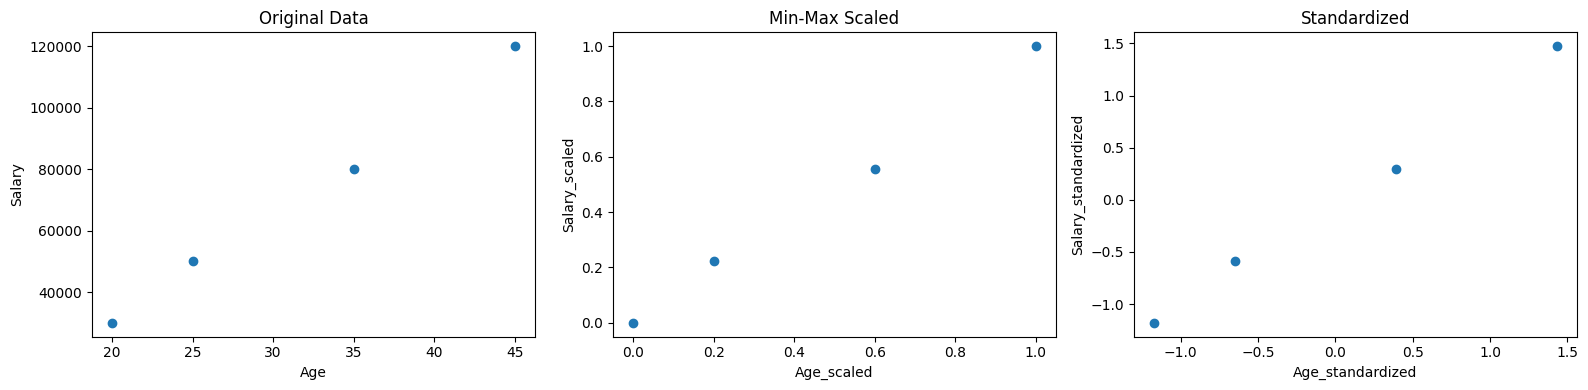

In [5]:

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(16, 4))

axs[0].set_title("Original Data")
axs[0].scatter(data[:,0], data[:,1])
axs[0].set_xlabel("Age")
axs[0].set_ylabel("Salary")

axs[1].set_title("Min-Max Scaled")
axs[1].scatter(minmax_scaled[:,0], minmax_scaled[:,1])
axs[1].set_xlabel("Age_scaled")
axs[1].set_ylabel("Salary_scaled")

axs[2].set_title("Standardized")
axs[2].scatter(standard_scaled[:,0], standard_scaled[:,1])
axs[2].set_xlabel("Age_standardized")
axs[2].set_ylabel("Salary_standardized")

plt.tight_layout()
plt.show()



## 🔹 8. When to Use What?

| Scaling Method | Use Case |
|----------------|----------|
| Min-Max Scaling | When using ML models sensitive to magnitudes and bounded inputs (e.g. neural nets) |
| Standardization | When you don’t know the data bounds, or using models assuming normal distribution (e.g. Logistic Regression, SVM) |



## ✅ Summary

- **Always scale your data** before feeding it into most ML models.
- Use **Min-Max Scaling** for bounded input or when working with pixel data (images).
- Use **Standardization** for statistical models or when outliers are not dominant.

| Algorithm Type                         | Requires Scaling? | Recommended Method           |
|----------------------------------------|-------------------|------------------------------|
| Distance-based (KNN, K-Means)          | ✅ Yes            | Min-Max or Standardization   |
| Gradient-based (NN, SVM)               | ✅ Yes            | Standardization              |
| Regularized Models (Ridge, Lasso)      | ✅ Yes            | Standardization              |
| PCA / LDA / t-SNE                      | ✅ Yes            | Standardization              |
| Tree-based (Random Forest, XGBoost)    | ❌ No             | Not needed                   |
